<a href="https://colab.research.google.com/github/kairamilanifitria/Anti-Bullying-for-Indonesia-Texts/blob/main/Bullying_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Conditioning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_all = pd.read_excel('/content/drive/MyDrive/Bootcamp AI/Project Akhir/DATASET CYBERBULLYING INSTAGRAM - FINAL.xlsx')
data_all

,Komentar,Kategori,Unnamed: 2,Unnamed: 3
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,NaN,NaN
1,"""makan nasi padang aja begini badannya""",Non-bullying,NaN,NaN
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,NaN,NaN
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,NaN,NaN
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,NaN,NaN
...,...,...,...,...
645,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,NaN,NaN
646,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,NaN,NaN
647,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,NaN,NaN
648,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,NaN,NaN


In [3]:
data_all = data_all.drop(data_all.columns[[2, 3]], axis=1)
data_all

,Komentar,Kategori
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying
1,"""makan nasi padang aja begini badannya""",Non-bullying
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying
...,...,...
645,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying
646,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying
647,"""paling ngiri liat orang keren maen alat musik...",Non-bullying
648,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying


In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Komentar  650 non-null    object
 1   Kategori  650 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


In [5]:
data_all.isnull().sum()

,0
Komentar,0
Kategori,0


In [6]:
data_all['Komentar'] = data_all['Komentar'].astype(str).str.replace('"', '')

In [7]:
data_all.head()

,Komentar,Kategori
0,"Kaka tidur yaa, udah pagi, gaboleh capek2",Non-bullying
1,makan nasi padang aja begini badannya,Non-bullying
2,yang aku suka dari dia adalah selalu cukur jem...,Bullying
3,Hai kak Isyana aku ngefans banget sama kak Isy...,Non-bullying
4,Manusia apa bidadari sih herann deh cantik ter...,Non-bullying


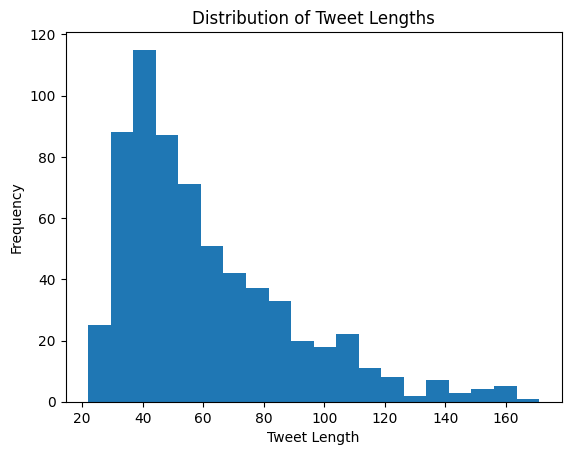

In [8]:
import matplotlib.pyplot as plt

# distibution of lengths
data_all['komentar_length'] = data_all['Komentar'].apply(len)
plt.hist(data_all['komentar_length'], bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

Kategori
Non-bullying    325
Bullying        325
Name: count, dtype: int64


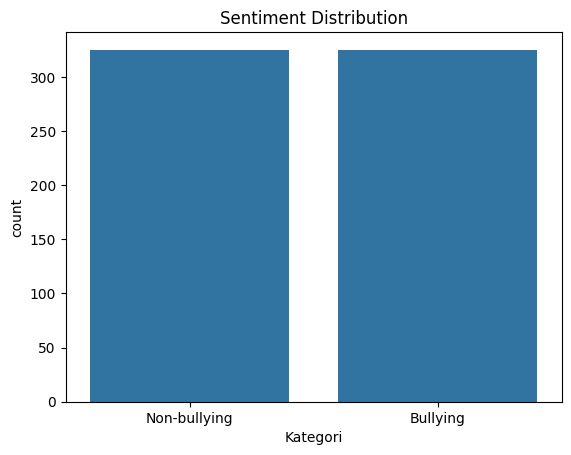

In [9]:
import seaborn as sns

sentiment_counts = data_all['Kategori'].value_counts()
print(sentiment_counts)

sns.countplot(x='Kategori', data=data_all)
plt.title('Sentiment Distribution')
plt.show()

In [10]:
data_all

,Komentar,Kategori,komentar_length
0,"Kaka tidur yaa, udah pagi, gaboleh capek2",Non-bullying,41
1,makan nasi padang aja begini badannya,Non-bullying,37
2,yang aku suka dari dia adalah selalu cukur jem...,Bullying,66
3,Hai kak Isyana aku ngefans banget sama kak Isy...,Non-bullying,109
4,Manusia apa bidadari sih herann deh cantik ter...,Non-bullying,52
...,...,...,...
645,aku memutuskan untuk menjadi fans isyana. gila...,Non-bullying,160
646,AMZING ISYANAA!! Jujur aku amazed banget denga...,Non-bullying,141
647,paling ngiri liat orang keren maen alat musik ...,Non-bullying,89
648,"Sampe ga bisa berkata2 lagi buat isyana, sanga...",Non-bullying,65


In [11]:
# drop the column komentar_length

data_all = data_all.drop(columns=['komentar_length'])
data_all

,Komentar,Kategori
0,"Kaka tidur yaa, udah pagi, gaboleh capek2",Non-bullying
1,makan nasi padang aja begini badannya,Non-bullying
2,yang aku suka dari dia adalah selalu cukur jem...,Bullying
3,Hai kak Isyana aku ngefans banget sama kak Isy...,Non-bullying
4,Manusia apa bidadari sih herann deh cantik ter...,Non-bullying
...,...,...
645,aku memutuskan untuk menjadi fans isyana. gila...,Non-bullying
646,AMZING ISYANAA!! Jujur aku amazed banget denga...,Non-bullying
647,paling ngiri liat orang keren maen alat musik ...,Non-bullying
648,"Sampe ga bisa berkata2 lagi buat isyana, sanga...",Non-bullying


In [12]:
# One-hot encode the 'Kategori' column
data_all['Kategori'] = data_all['Kategori'].map({'Bullying': 1, 'Non-bullying': 0})

data_all

,Komentar,Kategori
0,"Kaka tidur yaa, udah pagi, gaboleh capek2",0
1,makan nasi padang aja begini badannya,0
2,yang aku suka dari dia adalah selalu cukur jem...,1
3,Hai kak Isyana aku ngefans banget sama kak Isy...,0
4,Manusia apa bidadari sih herann deh cantik ter...,0
...,...,...
645,aku memutuskan untuk menjadi fans isyana. gila...,0
646,AMZING ISYANAA!! Jujur aku amazed banget denga...,0
647,paling ngiri liat orang keren maen alat musik ...,0
648,"Sampe ga bisa berkata2 lagi buat isyana, sanga...",0


## Text-Preprocessing

In [13]:
import re
import string

def clean_text(text):
    """
    Cleans the input text by:
    1. Removing URLs
    2. Removing mentions (@username)
    3. Removing hashtags (#hashtag)
    4. Removing punctuations
    5. Removing extra whitespaces
    6. Converting text to lowercase
    7. Removing non-alphanumeric characters (except spaces)
    """
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)

    # Remove punctuations
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers (optional, depending on your use case)
    text = re.sub(r"\d+", "", text)

    # Remove non-alphanumeric characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Convert text to lowercase
    text = text.lower()

    return text

In [14]:
# Clean the text column
data_all["Komentar"] = data_all["Komentar"].apply(clean_text)

In [15]:
data_all

,Komentar,Kategori
0,kaka tidur yaa udah pagi gaboleh capek,0
1,makan nasi padang aja begini badannya,0
2,yang aku suka dari dia adalah selalu cukur jem...,1
3,hai kak isyana aku ngefans banget sama kak isy...,0
4,manusia apa bidadari sih herann deh cantik terus,0
...,...,...
645,aku memutuskan untuk menjadi fans isyana gila ...,0
646,amzing isyanaa jujur aku amazed banget dengan ...,0
647,paling ngiri liat orang keren maen alat musik ...,0
648,sampe ga bisa berkata lagi buat isyana sangat ...,0


In [16]:
# split the data for training and testing
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_all,
                                         test_size=0.2,
                                         random_state=42)

print("Training data size:", len(train_data))
print("Testing data size:", len(test_data))

Training data size: 520
Testing data size: 130


apply the singkatan into train data

In [17]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
stop_words = set(stopwords.words('indonesian'))

unknown_words = set()

for komentar in train_data['Komentar']:
  words = word_tokenize(komentar)
  for word in words:
    if word.isalpha() and word.lower() not in stop_words and not word.lower().isascii():
      unknown_words.add(word.lower())

print("Possible unknown words in Indonesian:")
print(unknown_words)


Possible unknown words in Indonesian:
set()


In [19]:
# find the slang words based on dataset

from collections import defaultdict

def find_slang_words(df):
  """
  Identifies potential slang words in the dataset.

  Args:
    df: Pandas DataFrame containing the tweet data.

  Returns:
    A dictionary where keys are potential slang words and values are their counts.
  """

  word_counts = defaultdict(int)
  for komentar in train_data['Komentar']:
    words = word_tokenize(komentar)
    for word in words:
      if not word.isalpha() or word.lower() in stop_words or word.lower().isascii():
          continue
      word_counts[word.lower()] += 1

  potential_slang = {word: count for word, count in word_counts.items() if count >= 1} # You can adjust the threshold
  return potential_slang


slang_words = find_slang_words(train_data)

print("Potential Slang Words:")
for word, count in slang_words.items():
  print(f"{word}: {count}")

Potential Slang Words:


In [20]:
df_singkatan = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Project Akhir/kamus_singkatan.csv')
df_singkatan

,Unnamed: 0,singkatan,asli
0,0,abgny,abangnya
1,1,abis,habis
2,2,ad,ada
3,3,adek,adik
4,4,adik2,adik-adik
...,...,...,...
1498,1498,trm,terima
1499,1499,tukeran,tukar
1500,1500,tw,tahu
1501,1501,yup,ya


In [21]:
df_singkatan = df_singkatan.drop(columns=['Unnamed: 0'])
df_singkatan

,singkatan,asli
0,abgny,abangnya
1,abis,habis
2,ad,ada
3,adek,adik
4,adik2,adik-adik
...,...,...
1498,trm,terima
1499,tukeran,tukar
1500,tw,tahu
1501,yup,ya


In [22]:
def replace_slang(text, slang_dict):
    words = text.split()
    new_words = []
    for word in words:
        if word in slang_dict:
            new_words.append(slang_dict[word])
        else:
            new_words.append(word)
    return " ".join(new_words)

# Create a dictionary mapping slang words to their original forms
slang_dict = dict(zip(df_singkatan['singkatan'], df_singkatan['asli']))

# Apply the replacement function to the 'Komentar' column in train_data
train_data['Komentar'] = train_data['Komentar'].apply(lambda x: replace_slang(x, slang_dict))

In [23]:
train_data

,Komentar,Kategori
333,jijik astagah sok bat cakap njs,1
29,muka kamu sensual tetapi norak kenapa sudah,1
553,pantas pada senang kerja di rans mbak gigi tid...,0
286,anjing anjing berwujud manusia anjing asli tak...,1
425,wah ibarat lebih pilih iblis daripada bidadari...,1
...,...,...
71,jelek macam buntut kuali hahaha,1
106,mukanya mirip lagi ngeden pas boker,1
270,foto di upload nya maret yang comment jam jam ...,0
435,etdah tinggalkan yang baik demi lonte situ war...,1


also add the slangwords that are available in huggingface

In [24]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [25]:
from datasets import load_dataset

# Load the Indonesian slang dataset from Hugging Face
dataset = load_dataset("theonlydo/indonesia-slang")
slang_dict = {entry['slang']: entry['formal'] for entry in dataset['train']}

# Example slang dictionary (for reference)
print(slang_dict)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Repo card metadata block was not found. Setting CardData to empty.


slang-indo.csv:   0%|          | 0.00/65.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4412 [00:00<?, ? examples/s]

{'woww': 'wow', 'aminn': 'amin', 'met': 'selamat', 'netaas': 'menetas', 'keberpa': 'keberapa', 'eeeehhhh': 'eh', 'kata2nyaaa': 'kata-katanya', 'hallo': 'halo', 'kaka': 'kakak', 'ka': 'kak', 'daah': 'dah', 'aaaaahhhh': 'ah', 'yaa': 'ya', 'smga': 'semoga', 'slalu': 'selalu', 'amiin': 'amin', 'kk': 'kakak', 'trus': 'terus', 'sii': 'sih', 'nyenengin': 'menyenangkan', 'bgt': 'banget', 'gemess': 'gemas', 'akuuu': 'aku', 'jgn': 'jangan', 'udah': 'sudah', 'gitu': 'begitu', 'aja': 'saja', 'gemesiin': 'menggemaskan', 'menyenangkn': 'menyenangkan', 'rb': 'ribu', 'akau': 'aku', 'saranin': 'menyarankan', 'nemuin': 'menemukan', 'yah': 'ya', 'mnis2nya': 'manis-manisnya', 'gtu': 'begitu', 'tu': 'itu', 'idolaa': 'idola', 'bangett': 'banget', 'kaakk': 'kak', 'baaiikkk': 'baik', 'telaatt': 'telat', 'kaak': 'kak', 'yg': 'yang', 'lg': 'lagi', 'skarang': 'sekarang', 'sempet': 'sempat', 'karna': 'karena', 'ngga': 'enggak', 'mantep': 'mantap', 'loohhh': 'loh', 'yeee': 'ya', 'baguuuuus': 'bagus', 'sampe': 'sam

In [26]:
def replace_slang(tweet):
    return ' '.join([slang_dict.get(word, word) for word in tweet.split()])

# Apply the function to your dataset
train_data['Komentar'] = train_data['Komentar'].apply(replace_slang)

In [27]:
train_data

,Komentar,Kategori
333,jijik astagah sok banget cakap njs,1
29,muka kamu sensual tetapi norak kenapa sudah,1
553,pantas pada senang kerja di rans mbak gigi tid...,0
286,anjing anjing berwujud manusia anjing asli tak...,1
425,wah ibarat lebih pilih iblis daripada bidadari...,1
...,...,...
71,jelek macam buntut kuali hahaha,1
106,mukanya mirip lagi ngeden pas berak,1
270,foto di upload nya maret yang comment jam jam ...,0
435,etdah tinggalkan yang baik demi lonte situ war...,1


## Text-Embedding

In [28]:
# define the target and input value
X_train = train_data['Komentar'] # input value
y_train = train_data['Kategori']  # target value

X_test = test_data['Komentar'] # input value
y_test = test_data['Kategori']  # target value

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

print('Training Data :', X_test.shape)
print('Testing Data : ', y_test.shape)

Training Data : (520,)
Testing Data :  (130,)
Training Data : (130,)
Testing Data :  (130,)


In [29]:
!pip install torch datasets

In [30]:
from datasets import Dataset

# Prepare train and validation datasets
train_data = Dataset.from_dict({"text": X_train, "label": y_train})
val_data = Dataset.from_dict({"text": X_test, "label": y_test})

In [31]:
import torch

# Check if a GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [46]:
from transformers import BertTokenizer, BertModel

# Load IndoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis')
bert_model = BertModel.from_pretrained('Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis').to(device)

In [47]:
# Tokenize function
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

# Apply tokenization to the datasets
train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)

# Set the dataset format for PyTorch
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/520 [00:00<?, ? examples/s]

Map:   0%|          | 0/130 [00:00<?, ? examples/s]

## Modelling

In [48]:
from transformers import AutoModelForSequenceClassification

# Load the pre-trained IndoBERT model for sequence classification
# Adding ignore_mismatched_sizes=True to handle the shape mismatch
model = AutoModelForSequenceClassification.from_pretrained(
    'Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis',
    num_labels=2,
    ignore_mismatched_sizes=True
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [51]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",  # Evaluate every `eval_steps`
    eval_steps=100,
    save_strategy="steps",        # Save every `save_steps`
    save_steps=500,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=100,
    fp16=True,
    metric_for_best_model="accuracy",
    load_best_model_at_end=True,
    report_to=["tensorboard"],
    push_to_hub=False
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Pass the compute_metrics function directly
    callbacks=[loss_callback]  # Add loss tracking callback
)

<ipython-input-55-51f82fe22b47>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [56]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
100,0.064900,0.610733,0.884615,0.884677,0.885680,0.884615
200,0.190000,0.446082,0.876923,0.876981,0.877455,0.876923
300,0.048200,0.496712,0.923077,0.923077,0.927018,0.923077


TrainOutput(global_step=325, training_loss=0.09621648146555974, metrics={'train_runtime': 44.5047, 'train_samples_per_second': 58.421, 'train_steps_per_second': 7.303, 'total_flos': 171022185984000.0, 'train_loss': 0.09621648146555974, 'epoch': 5.0})

### Result

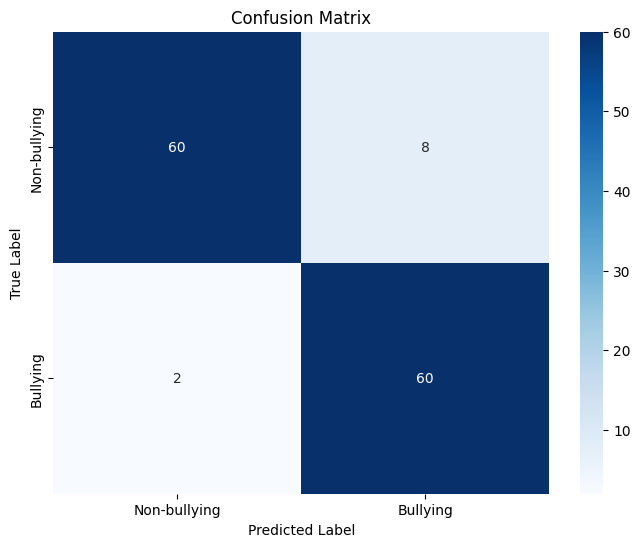

In [57]:
# Make predictions on the test set
predictions = trainer.predict(val_data)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-bullying', 'Bullying'],
            yticklabels=['Non-bullying', 'Bullying'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [58]:
import os

# Define the path in Google Drive where you want to save the model
output_dir = '/content/drive/MyDrive/Bootcamp AI/Project Akhir/Indobert-model'

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the trained model and tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model saved to {output_dir}")


Model saved to /content/drive/MyDrive/Bootcamp AI/Project Akhir/Indobert-model


In [67]:
# make a prediction in using the model

import torch
from transformers import BertTokenizer, AutoModelForSequenceClassification

# Load the saved model and tokenizer
model_path = '/content/drive/MyDrive/Bootcamp AI/Project Akhir/Indobert-model'  # Replace with your actual path
tokenizer = BertTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Example text for prediction
text = "JELEK BANGET AH"

# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt")

# Make the prediction
with torch.no_grad():
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=-1).item()

# Print the predicted class (0 or 1)
print(f"Predicted class: {predicted_class}")

# Interpret the prediction
if predicted_class == 1:
    print("Prediction: Bullying")
else:
    print("Prediction: Non-bullying")

Predicted class: 1
Prediction: Bullying


THE RESULT IS TRUE

In [68]:
# make a prediction in using the model

import torch
from transformers import BertTokenizer, AutoModelForSequenceClassification

# Load the saved model and tokenizer
model_path = 'Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis'  # Replace with your actual path
tokenizer = BertTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Example text for prediction
text = "JELEK BANGET AH"

# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt")

# Make the prediction
with torch.no_grad():
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=-1).item()

# Print the predicted class (0 or 1)
print(f"Predicted class: {predicted_class}")

# Interpret the prediction
if predicted_class == 1:
    print("Prediction: Bullying")
else:
    print("Prediction: Non-bullying")

Predicted class: 0
Prediction: Non-bullying
